<a href="https://colab.research.google.com/github/Tanyyaaaaaaa/l1/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [16]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
y_test = y_test.reshape(-1,)

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

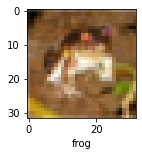

In [23]:
plot_sample(X_train, y_train, 0)

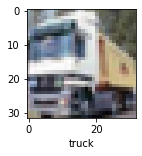

In [24]:
plot_sample(X_train, y_train, 1)

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8125 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6247 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5382 - accuracy: 0.4609
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4813 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4303 - accuracy: 0.4961


In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.42      0.52      1000
           1       0.62      0.60      0.61      1000
           2       0.38      0.27      0.31      1000
           3       0.44      0.22      0.29      1000
           4       0.31      0.59      0.40      1000
           5       0.44      0.35      0.39      1000
           6       0.43      0.66      0.52      1000
           7       0.60      0.48      0.53      1000
           8       0.57      0.68      0.62      1000
           9       0.57      0.56      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4063 - accuracy: 0.4972
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0667 - accuracy: 0.6238
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9388 - accuracy: 0.6720
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8489 - accuracy: 0.7064
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7797 - accuracy: 0.7292
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7077 - accuracy: 0.7537
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6564 - accuracy: 0.7728
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6011 - accuracy: 0.7900
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5517 - accuracy: 0.8065
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9793 - accuracy: 0.6955


[0.9792734384536743, 0.6955000162124634]

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.39160043e-04, 1.40332108e-04, 6.03395398e-04, 8.78542840e-01,
        5.10032150e-05, 1.17567740e-01, 2.39326246e-03, 7.60731609e-07,
        1.06387044e-04, 5.51691373e-05],
       [5.15800366e-06, 2.90583957e-05, 3.30487815e-09, 3.16476498e-11,
        1.72085082e-10, 1.94512510e-13, 1.77628173e-11, 7.26048019e-13,
        9.99965787e-01, 3.37177291e-08],
       [5.61989009e-01, 8.95109773e-03, 2.61197891e-03, 3.08041624e-03,
        1.20348902e-03, 2.40822934e-04, 8.78062157e-04, 7.98510155e-04,
        2.21035331e-01, 1.99211285e-01],
       [9.75574374e-01, 9.02043212e-06, 1.61014602e-03, 4.13166299e-06,
        9.68332242e-05, 2.88383148e-08, 2.14807869e-06, 3.84475516e-06,
        2.26880386e-02, 1.14165605e-05],
       [1.13047022e-07, 1.42343970e-06, 1.71772728e-03, 7.41539299e-02,
        8.91279995e-01, 1.36647213e-04, 3.27099487e-02, 3.67876858e-08,
        7.78955389e-09, 1.09444450e-07]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

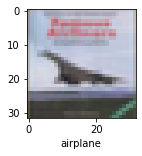

In [46]:
plot_sample(X_test, y_test, 3)

In [39]:
classes[y_classes[3]]

'airplane'

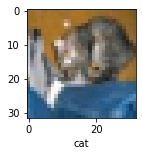

In [43]:
plot_sample(X_test, y_test, 0)

In [45]:
classes[y_classes[0]]

'cat'

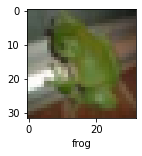

In [50]:
plot_sample(X_test, y_test, 7)

In [49]:
classes[y_classes[7]]

'frog'

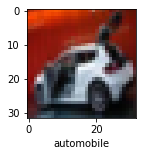

In [51]:
plot_sample(X_test, y_test, 6)

In [52]:
classes[y_classes[6]]

'automobile'

In [56]:
classes[y_classes[11]]

'truck'

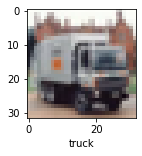

In [58]:
plot_sample(X_test, y_test, 11)